<a href="https://colab.research.google.com/github/yoseforaz0990/GrowthCurve_SVR/blob/main/GrowthCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
data = pd.read_csv('file.csv')
data.head(n=5)

Time       WT        G5a       A3c     gAG     UuG       UAc      BS-G  \
0  0.02  0.089333  0.089667  0.088667  0.0865  0.0875  0.087000  0.095000   
1  0.25  0.091333  0.094000  0.091667  0.0895  0.0915  0.088667  0.097667   
2  0.50  0.095000  0.097333  0.094667  0.0915  0.0920  0.090667  0.099000   
3  0.75  0.094667  0.100667  0.096667  0.0945  0.0925  0.092667  0.100333   
4  1.00  0.095333  0.100000  0.099000  0.0945  0.0940  0.092000  0.102333   

       BS-C  BS-G + UuG  ...  UuG + U1  UuG + U2  UuG + U4  UuG + U5  \
0  0.089333    0.089000  ...  0.089667  0.089333  0.089667    0.0880   
1  0.095333    0.091667  ...  0.098333  0.102000  0.101000    0.0905   
2  0.096333    0.095000  ...  0.097333  0.099000  0.103667    0.0925   
3  0.098667    0.096333  ...  0.098333  0.099333  0.104667    0.0935   
4  0.101000    0.096333  ...  0.099000  0.099333  0.104000    0.0965   

   UuG + U6  UAc + U1  UAc + U2  UAc + U4  UAc + U5  UAc + U6  
0    0.0895    0.0890  0.091667  0.086667  0.086667  0.090333  
1    0.0980    0.1005  0.097667  0.096000  0.098667  0.095667  
2    0.0970    0.0970  0.098333  0.096000  0.102000  0.093667  
3    0.0975    0.0955  0.100333  0.097000  0.097667  0.095000  
4    0.0975    0.0985  0.101000  0.096333  0.103333  0.094333  

[5 rows x 44 columns]

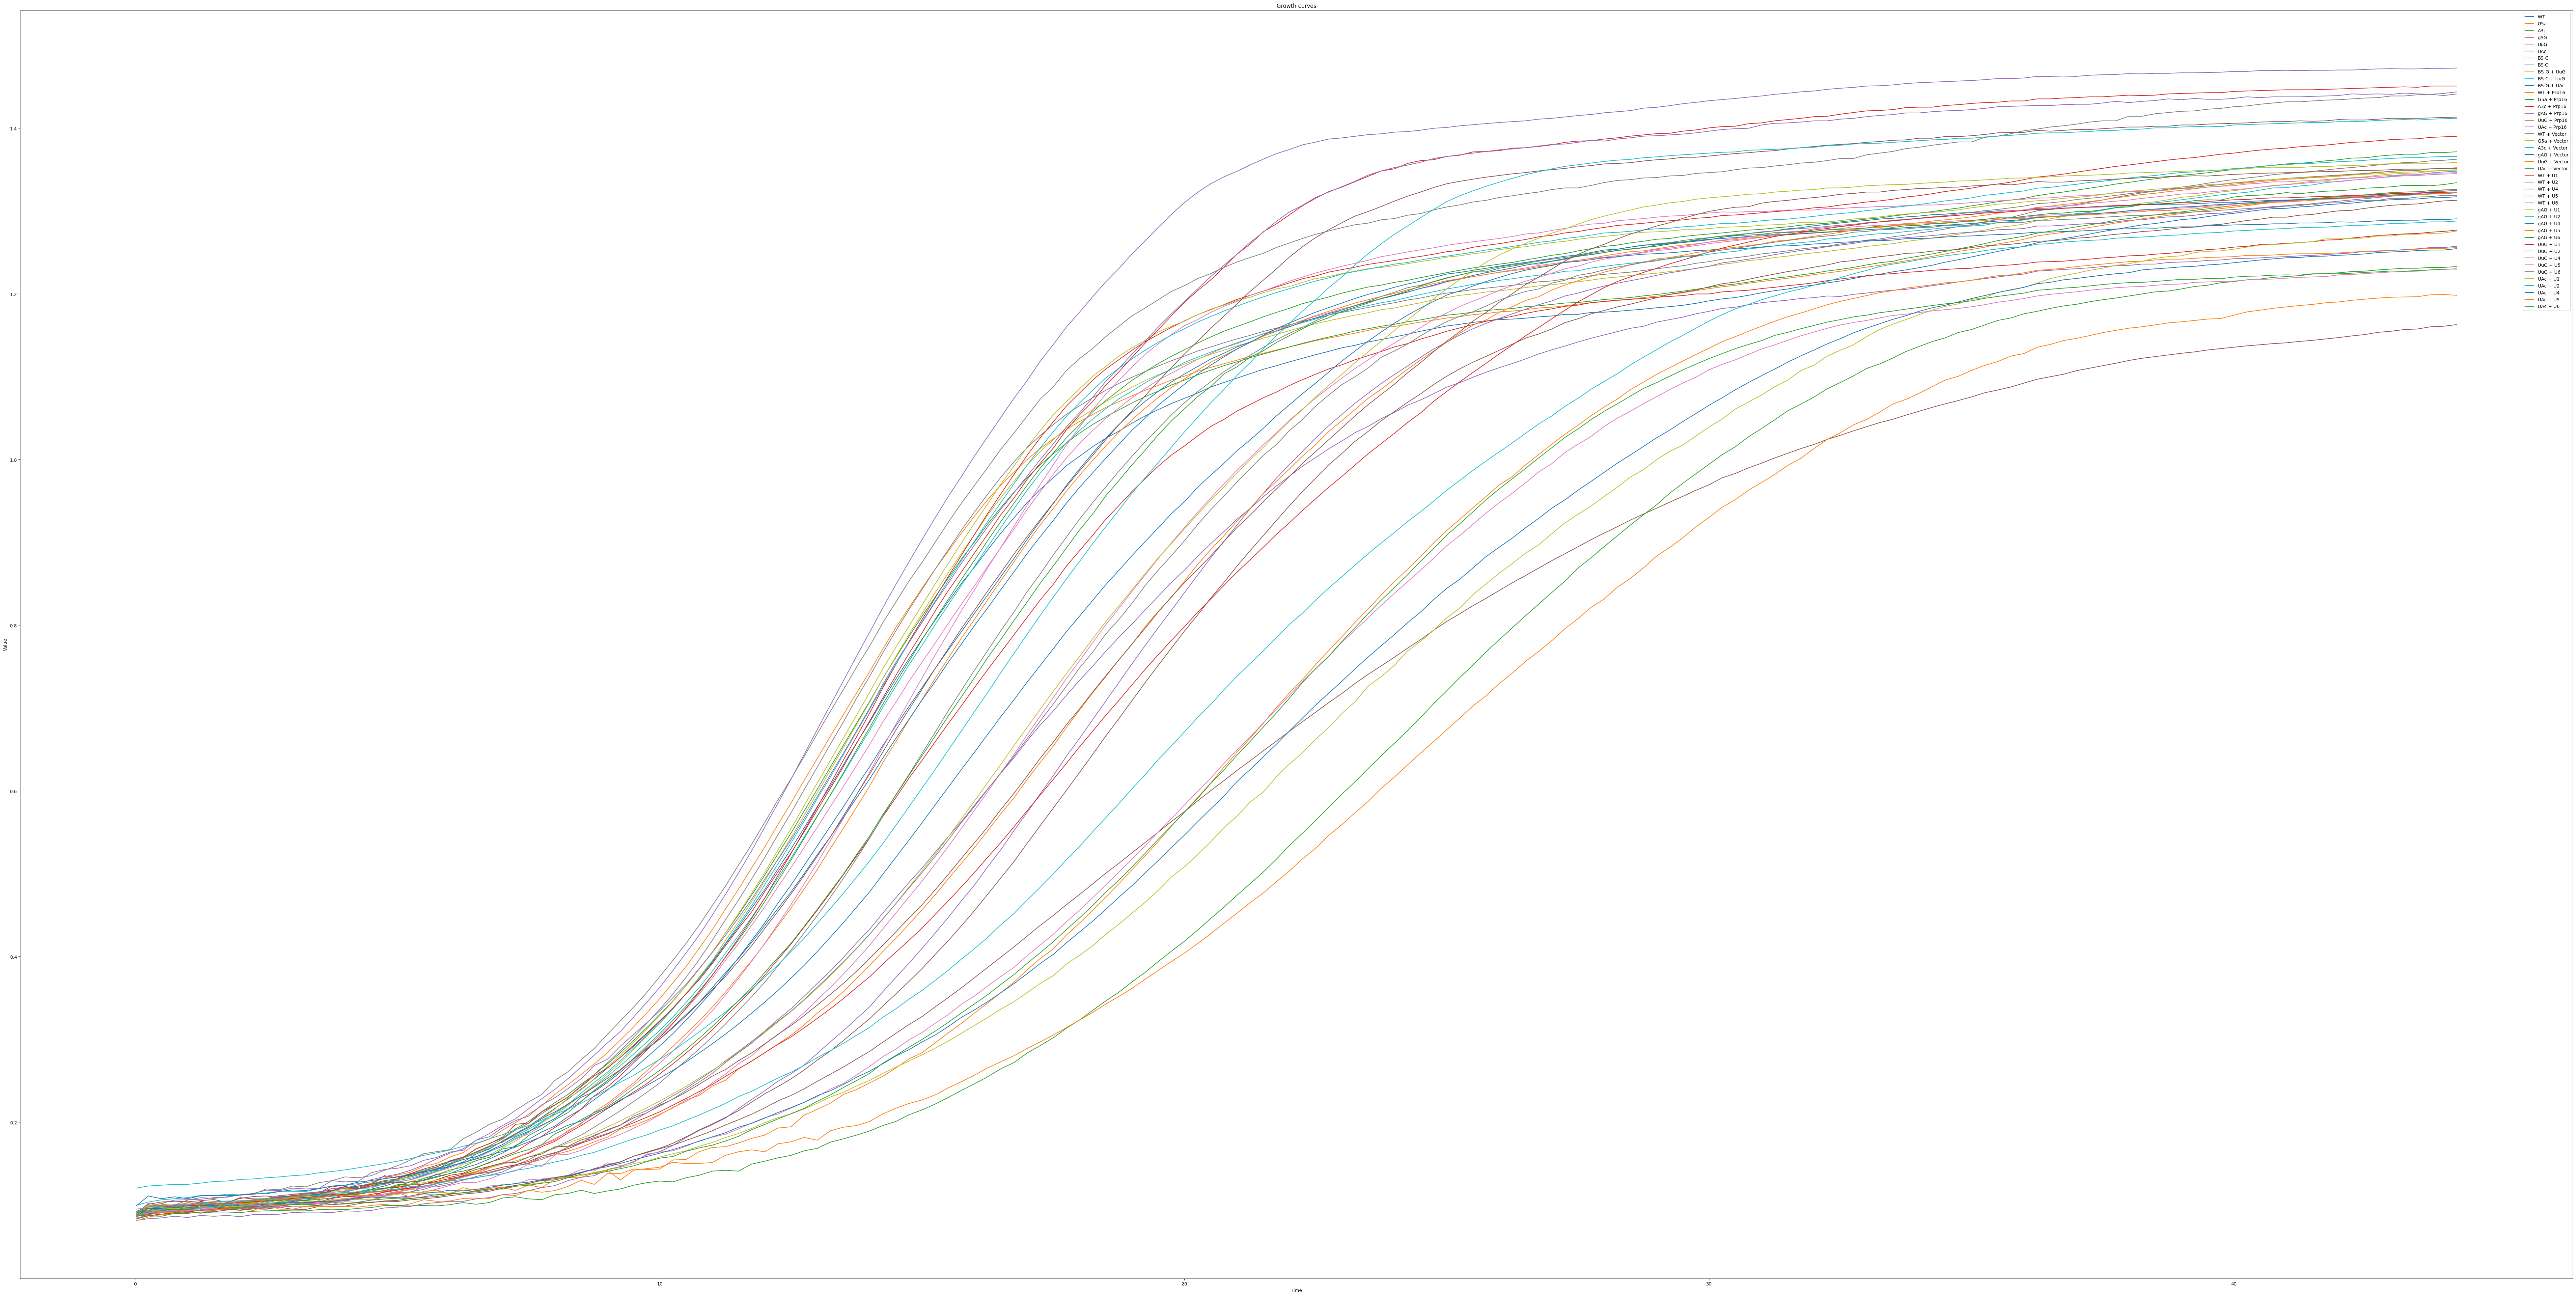

In [24]:

# Load the data
df = pd.read_csv('file.csv', index_col=0, parse_dates=True)

# Plot all columns in the same figure
fig, ax = plt.subplots(figsize=(100, 50))
for col in df.columns:
    ax.plot(df.index, df[col], label=col)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Growth curves')
plt.show()

In [245]:
X = data.iloc[:, 1].values
y = data.iloc[:, 0].values

In [246]:
y = y.reshape(len(y),1)

In [247]:
X = X.reshape(len(X),1)

In [248]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#SVR

In [249]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

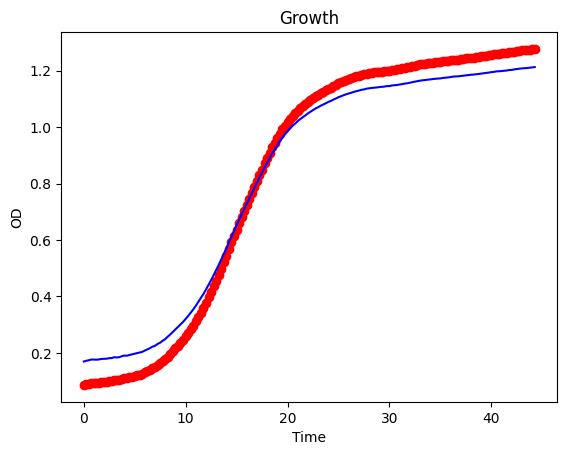

In [229]:
plt.scatter(sc_y.inverse_transform(y), sc_X.inverse_transform(X), color = 'red')
plt.plot(sc_y.inverse_transform(y), sc_X.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Growth')
plt.xlabel('Time')
plt.ylabel('OD')
plt.show()

#The slopes of linear regression and Support Vector Regression (SVR) represent different concepts and have different implications.

In linear regression, the slope represents the change in the target variable (dependent variable) for a one-unit change in the input feature (independent variable). It represents the rate at which the target variable is expected to change with respect to a unit change in the input.

In SVR, the slope of the regression hyperplane is related to the weights of the features in the model. The weights (coefficients) in SVR determine the importance of each feature in predicting the target variable. A higher absolute value of the weight means that the corresponding feature has more influence on the prediction. So, a higher weight leads to a steeper slope of the hyperplane, indicating that the model is putting more emphasis on fitting the data points close to the hyperplane.

Therefore, the two slopes have different interpretations and implications, and they can indeed be opposite depending on the specific data and the problem being solved. In linear regression, a steeper slope means a stronger relationship between the input and target variables, while in SVR, a steeper slope means a tighter fit to the data points that are important for the model's decision boundary.

In [250]:
coefficients = regressor.coef_
print(coefficients)

[[0.88407144]]


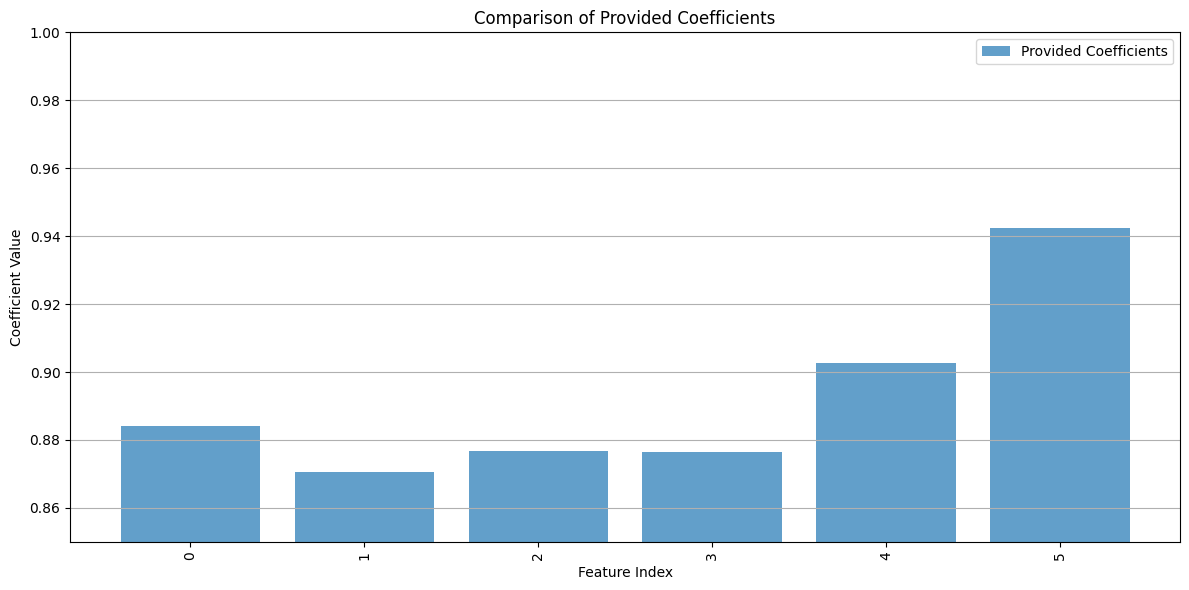

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# The provided array
data_array = [[0.88407144, 0.87052021, 0.87661105, 0.87643515, 0.90267079, 0.94246957
              ]]

# Convert the provided array to a DataFrame
df_provided = pd.DataFrame(data_array)

# Plot the provided coefficients for comparison
plt.figure(figsize=(12, 6))
plt.bar(df_provided.columns, df_provided.values[0], label='Provided Coefficients', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Provided Coefficients')
plt.legend()
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(0.85, 1)  # Set the desired range for the y-axis here
plt.tight_layout()
plt.show()


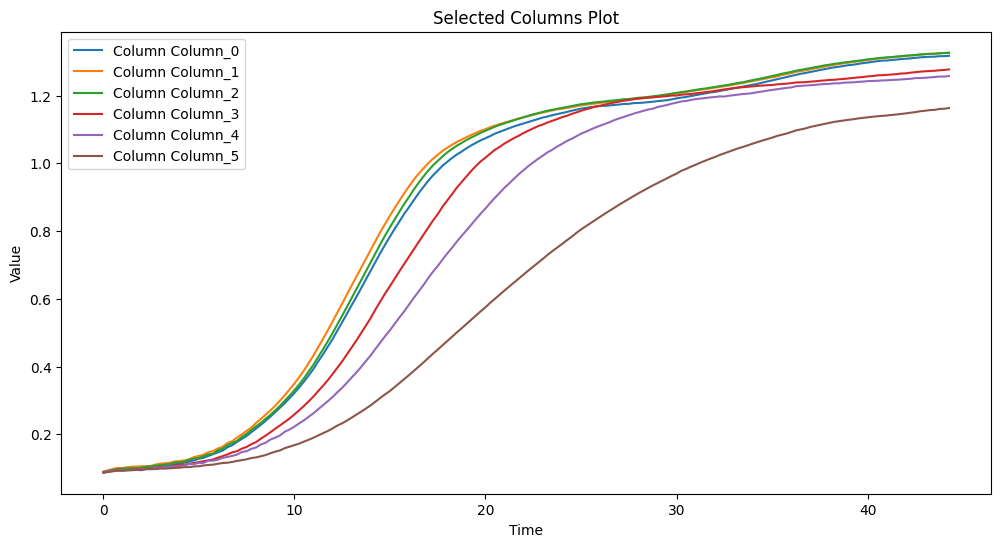

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('file.csv', index_col=0, parse_dates=True)

# Select the specific columns
selected_columns = [0,1,2, 3, 4,5]
selected_df = df.iloc[:, selected_columns]

# Assign new column names
new_column_names = ['Column_0', 'Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5'] #'Column_0=WT
selected_df.columns = new_column_names

# Plot the selected columns in the same figure
fig, ax = plt.subplots(figsize=(12, 6))
for col in selected_df.columns:
    ax.plot(selected_df.index, selected_df[col], label=f'Column {col}')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Selected Columns Plot')
plt.show()


https://www.saedsayad.com/support_vector_machine_reg.htm

#Minimize: (1/2) * ||w||^2 + C * Σ(ξ_i + ξ_i^*)

Let's clarify the relationship between the slope of the hyperplane (steepness), the coefficients of the SVR model, and the margin.

In linear SVR, the objective is to find a hyperplane of the form:

y = w^T * x + b

where:

y is the predicted target value,
x is the input feature vector,
w is the weight vector (coefficients),
b is the bias term.
The coefficients w represent the slope of the hyperplane in each feature dimension. The larger the absolute value of a coefficient, the steeper the hyperplane in the corresponding feature dimension.

The optimization problem in SVR can be formulated as:

Minimize: (1/2) * ||w||^2 + C * Σ(ξ_i + ξ_i^*)

Subject to: y_i - (w^T * x_i + b) <= ε + ξ_i
(w^T * x_i + b) - y_i <= ε + ξ_i^*
ξ_i, ξ_i^* >= 0

Where:

||w||^2 represents the squared L2 norm of the weight vector w. This term penalizes the size of the coefficients and controls the model's complexity.
C is the regularization parameter that controls the trade-off between minimizing the error and the size of the coefficients. A smaller C allows for larger coefficients (steep hyperplane), while a larger C penalizes larger coefficients (gentle hyperplane).
ξ_i and ξ_i^* are slack variables that represent the margin violations for positive and negative deviations from the regression hyperplane, respectively.
ε is the margin width.
The optimization problem aims to minimize the regularization term (||w||^2) to encourage larger coefficients (steep hyperplane) when C is small. On the other hand, when C is large, the regularization term becomes more important, leading to smaller coefficients (gentle hyperplane).

In summary, when C is small, the model allows for a tighter fit, leading to larger coefficients (steeper hyperplane). When C is large, the model allows for a wider margin and puts more emphasis on regularization, resulting in smaller coefficients (gentle hyperplane). So, the relationship between the slope of the hyperplane and the coefficients is indirectly controlled by the regularization parameter C.

#simple linear regression

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(y, X)

LinearRegression()

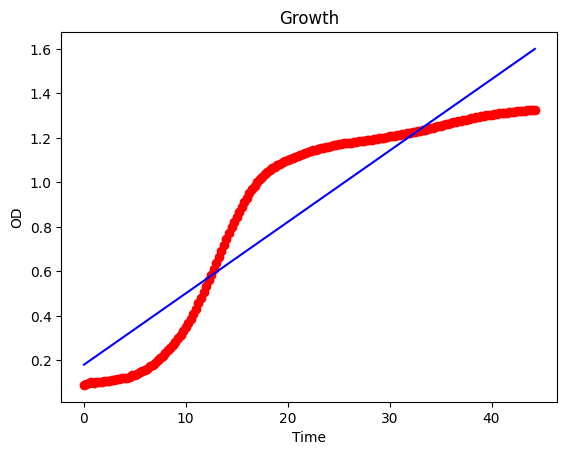

In [121]:
plt.scatter(y, X, color = 'red')
plt.plot(y, regressor.predict(y), color = 'blue')
plt.title('Growth')
plt.xlabel('Time')
plt.ylabel('OD')
plt.show()

#Polynomial regression

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
y_poly = poly_reg.fit_transform(y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(y_poly, X)

LinearRegression()

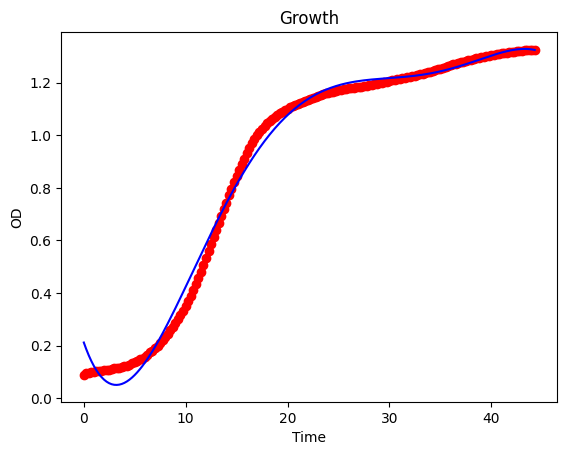

In [128]:
plt.scatter(y, X, color = 'red')
plt.plot(y, lin_reg_2.predict(poly_reg.fit_transform(y)), color = 'blue')
plt.title('Growth')
plt.xlabel('Time')
plt.ylabel('OD')
plt.show()